In [1]:
import os
import pymysql
import pandas as pd

In [2]:
host = 'localhost'
port = 3306
user = 'root'
password = os.getenv('MYSQL_PASSWORD')
database = 'money'


In [3]:
conn = pymysql.connect(
    host=host,
    port=port,
    user=user,
    passwd=password,
    db=database,
    charset='utf8mb4')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# ORCL Stocks

In [5]:
df = pd.read_sql_query(
    """
    select * from tickers_daily where name='ORCL' and day>'2010-01-01';
    """
    ,
    conn
)
df.head()

,name,description,exchange,day,open,high,low,close,adj_close,volume,open_interest
0,ORCL,,nyse stocks,2010-01-04,21.858,22.308,21.839,22.003,-1.0,30256580,0
1,ORCL,,nyse stocks,2010-01-05,21.904,22.003,21.564,21.979,-1.0,32372102,0
2,ORCL,,nyse stocks,2010-01-06,21.804,22.070,21.591,21.663,-1.0,27733637,0
3,ORCL,,nyse stocks,2010-01-07,21.671,21.794,21.322,21.591,-1.0,34395957,0
4,ORCL,,nyse stocks,2010-01-08,21.486,21.920,21.478,21.858,-1.0,26583746,0


/Users/mikc/.virtualenvs/cv/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


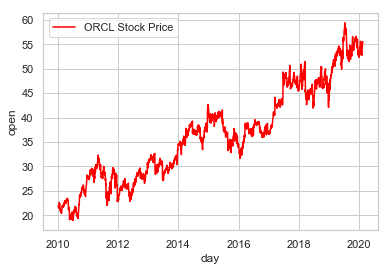

In [6]:
sns.lineplot(df['day'], df['open'], label='ORCL Stock Price', color='red')

In [57]:
class Environment(object):
    def __init__(self, data, history_t=90):
        self.data = data
        self.history_t = history_t
        self.reset()
        
    def reset(self):
        self.t = 0
        self.done = False
        self.profits = 0
        self.positions = []
        self.position_value = 0
        self.history = [0 for _ in range(self.history_t)]
        return [self.position_value] + self.history # obs
    
    def step(self, act):
        reward = 0
        
        # act = 0: stay, 1: buy, 2: sell
        if act == 1:
            print("AAAA")
            self.positions.append(self.data.iloc[self.t, :]['close'])
        elif act == 2: # sell
            if len(self.positions) == 0:
                reward = -1
            else:
                profits = 0
                for p in self.positions:
                    profits += (self.data.iloc[self.t, :]['close'] - p)
                reward += profits
                self.profits += profits
                self.positions = []
        
        # set next time
        self.t += 1
        
        self.position_value = 0
        for p in self.positions:
            self.position_value += (self.data.iloc[self.t, :]['close'] - p)
        self.history.pop(0)
        self.history.append(self.data.iloc[self.t, :]['close'] - self.data.iloc[(self.t-1), :]['close'])
        if (self.t==len(self.data)-1):
            self.done=True
        # clipping reward
        if reward > 0:
            reward = 1
        elif reward < 0:
            reward = -1
        #print ("t={%d}, done={%str}"%(self.t,self.done))
        return [self.position_value] + self.history, reward, self.done # obs, reward, done
        

In [62]:
env=Environment(df)
env.step(1)
for i in range(200):
    env.step(0)
env.step(2)

AAAA


([0,
  -0.018000000000000682,
  -0.09799999999999898,
  0.11599999999999966,
  -0.09799999999999898,
  -0.17600000000000193,
  -0.18799999999999883,
  -0.40500000000000114,
  0.39000000000000057,
  -0.18599999999999994,
  -0.6229999999999976,
  -0.25900000000000034,
  0.08299999999999841,
  0.2469999999999999,
  0.4349999999999987,
  0.6820000000000022,
  0.11499999999999844,
  0.13300000000000267,
  0.00999999999999801,
  0.29100000000000037,
  0.20700000000000074,
  -0.10200000000000031,
  -0.495000000000001,
  0.28500000000000014,
  0.2940000000000005,
  -0.3210000000000015,
  0.6630000000000003,
  0.1700000000000017,
  0.12300000000000111,
  -0.06400000000000006,
  -0.2560000000000002,
  -0.5120000000000005,
  -0.0519999999999996,
  0.5719999999999992,
  -0.06599999999999895,
  0.24599999999999866,
  -0.17999999999999972,
  0.08200000000000074,
  -0.10500000000000043,
  0.022999999999999687,
  -0.5530000000000008,
  -0.6400000000000006,
  -0.2469999999999999,
  0.05100000000000193,